<a href="https://colab.research.google.com/github/Shantanuh10/Airbnb_EDA_Project-/blob/main/Shantanu's_Notebook_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing data by reading csv file
file_path = '/content/drive/MyDrive/Capstone Project (AlmaBetter)/Airbnb EDA Project/Copy of Airbnb NYC 2019.csv'
airbnb_df=pd.read_csv(file_path)

In [ ]:
#Understanding the Data
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
airbnb_df.shape

(48895, 16)

## Cleaning the Data

In [ ]:
#Removing the Duplicates if any
airbnb_df.duplicated().sum()
airbnb_df.drop_duplicates(inplace=True)
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
# Drop null observations
airbnb_non_null_df = airbnb_df.dropna()

In [ ]:
airbnb_non_null_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  float64
 7   longitude                       38821 non-null  float64
 8   room_type                       38821 non-null  object 
 9   price                           38821 non-null  int64  
 10  minimum_nights                  38821 non-null  int64  
 11  number_of_reviews               38821 non-null  int64  
 12  last_review                     

### Finding Total count of each room types

In [ ]:
# Finding unique values from column 'room_type'
airbnb_room_type = airbnb_df.room_type.unique()

In [ ]:
airbnb_room_type

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
# Which is the most listed room type?
airbnb_roomtype_frequency = dict(airbnb_df.room_type.value_counts())

In [ ]:
airbnb_roomtype_frequency

{'Entire home/apt': 25409, 'Private room': 22326, 'Shared room': 1160}

Text(0.5, 1.0, 'Count of Listed Rooms')

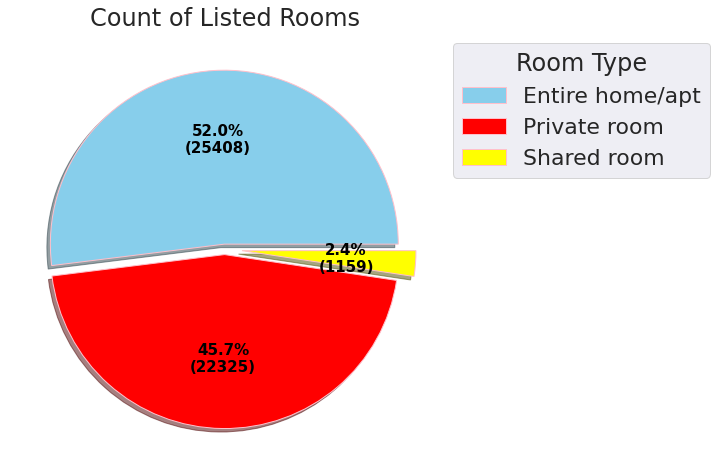

In [ ]:
# Creating Dataset 

room_type = list(airbnb_roomtype_frequency.keys())
data = list(airbnb_roomtype_frequency.values())

# Creating color parameters

colors = ( "skyblue", "red", "yellow",)

# Creating explode data

explode = (0.03, 0.03, 0.1)

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "pink" }

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Creating Pie Chart

# Creating plot
fig, airbnb_pie_chart = plt.subplots(figsize =(12, 8))
wedges, texts, autotexts = airbnb_pie_chart.pie(data, autopct = lambda pct: func(pct, data),                                              
                                                explode = explode,
                                                shadow = True,
                                                colors = colors,
                                                startangle = 0,
                                                wedgeprops = wp,
                                                textprops = dict(color ="black"))

# Adding legend
airbnb_pie_chart.legend(wedges, room_type,
                        title ="Room Type",
                        loc ="upper left",          
                        bbox_to_anchor=(1, 0., 0.,1))

plt.setp(autotexts, size = 15, weight = "bold")
airbnb_pie_chart.set_title("Count of Listed Rooms")
  



# Finding Top 25 most used words from listing names

In [ ]:
#Creting empty list to store name strings
airbnb_names=[]

#Getting name string from 'name' column and appending it to the empty list
for name in airbnb_df.name:
    airbnb_names.append(name)

#Setting a function to split name strings into seperate words
def split_name(name):
    ns = str(name).split()
    return ns

#Creating empty list to store the count of words
names_count = []

#Getting name string to append it to the names_count list
for n in airbnb_names:
    for word in split_name(n):
        word = word.lower()
        names_count.append(word)

In [ ]:
# Importing 'counter' library to count and generate raw data and count top 25 most used words
from collections import Counter

# Counting most common words
count_words = Counter(names_count).most_common()
count_words[:25]


[('in', 16733),
 ('room', 9389),
 ('bedroom', 7231),
 ('private', 6985),
 ('apartment', 6113),
 ('cozy', 4634),
 ('the', 3869),
 ('to', 3827),
 ('studio', 3772),
 ('brooklyn', 3629),
 ('apt', 3571),
 ('spacious', 3387),
 ('1', 3357),
 ('with', 3092),
 ('2', 3079),
 ('of', 2993),
 ('east', 2967),
 ('and', 2869),
 ('manhattan', 2855),
 ('&', 2820),
 ('park', 2632),
 ('sunny', 2536),
 ('beautiful', 2320),
 ('near', 2295),
 ('williamsburg', 2293)]

In [ ]:
# Cleaning the List by removing prepositions
items_to_remove = {('in', 16733), ('the', 3869), ('to', 3827), ('of', 2993), ('-', 2272), ('a', 1909)}
top_25_cleaned = [e for e in count_words if e not in items_to_remove]
top_25 = top_25_cleaned[:25]
top_25

[('room', 9389),
 ('bedroom', 7231),
 ('private', 6985),
 ('apartment', 6113),
 ('cozy', 4634),
 ('studio', 3772),
 ('brooklyn', 3629),
 ('apt', 3571),
 ('spacious', 3387),
 ('1', 3357),
 ('with', 3092),
 ('2', 3079),
 ('east', 2967),
 ('and', 2869),
 ('manhattan', 2855),
 ('&', 2820),
 ('park', 2632),
 ('sunny', 2536),
 ('beautiful', 2320),
 ('near', 2295),
 ('williamsburg', 2293),
 ('village', 2055),
 ('heart', 2044),
 ('large', 1882),
 ('loft', 1822)]

In [ ]:
#converting the data into DataFrame
word_count_df = pd.DataFrame(top_25)
word_count_df.rename(columns={0:'Words',1:'Counts'},inplace=True)
word_count_df

,Words,Counts
0,room,9389
1,bedroom,7231
2,private,6985
3,apartment,6113
4,cozy,4634
5,studio,3772
6,brooklyn,3629
7,apt,3571
8,spacious,3387
9,1,3357


### Visualizing the findings

[Text(0, 0, 'room'),
 Text(0, 0, 'bedroom'),
 Text(0, 0, 'private'),
 Text(0, 0, 'apartment'),
 Text(0, 0, 'cozy'),
 Text(0, 0, 'studio'),
 Text(0, 0, 'brooklyn'),
 Text(0, 0, 'apt'),
 Text(0, 0, 'spacious'),
 Text(0, 0, '1'),
 Text(0, 0, 'with'),
 Text(0, 0, '2'),
 Text(0, 0, 'east'),
 Text(0, 0, 'and'),
 Text(0, 0, 'manhattan'),
 Text(0, 0, '&'),
 Text(0, 0, 'park'),
 Text(0, 0, 'sunny'),
 Text(0, 0, 'beautiful'),
 Text(0, 0, 'near'),
 Text(0, 0, 'williamsburg'),
 Text(0, 0, 'village'),
 Text(0, 0, 'heart'),
 Text(0, 0, 'large'),
 Text(0, 0, 'loft')]

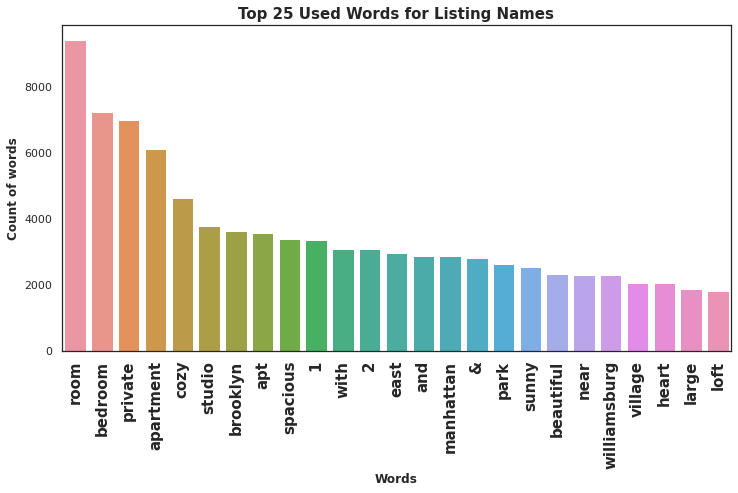

In [ ]:
#Setting the figure size
sns.set(rc={'figure.figsize':(12,6)})

#Setting background colour of chart as white
sns.set_style('white')

#Plotting the Chart
count_viz = sns.barplot(x='Words',y='Counts', data = word_count_df)

# Naming the Chart
count_viz.set_title('Top 25 Used Words for Listing Names', weight = 'bold').set_fontsize('15')


# Naming X & Y axis
count_viz.set_ylabel('Count of words', weight = 'bold')
count_viz.set_xlabel('Words', weight = 'bold')

#Adjusting Bar labels
count_viz.set_xticklabels(count_viz.get_xticklabels(),rotation = 90, weight = 'bold', size = '15')



## Finding Top 10 Listing Counts

In [ ]:
airbnb_df['host_id'].count()

48895

In [137]:
#Creating DataFrame
count_host_id = list(airbnb_df['host_id'].value_counts())
host_id = list(airbnb_df.host_id)
listing_count= list(zip(host_id,count_host_id))
count_host_id_df= pd.DataFrame(listing_count)
count_host_id_df.rename(columns={0:'Host_Id',1:'Counts'},inplace=True)

#Storing top 10 hosts with most listings
top_host_id = count_host_id_df.head(10)
top_host_id

,Host_Id,Counts
0,2787,327
1,2845,232
2,4632,121
3,4869,103
4,7192,96
5,7322,96
6,7356,91
7,8967,87
8,7490,65
9,7549,52


[Text(0, 0, '2787'),
 Text(0, 0, '2845'),
 Text(0, 0, '4632'),
 Text(0, 0, '4869'),
 Text(0, 0, '7192'),
 Text(0, 0, '7322'),
 Text(0, 0, '7356'),
 Text(0, 0, '8967'),
 Text(0, 0, '7490'),
 Text(0, 0, '7549')]

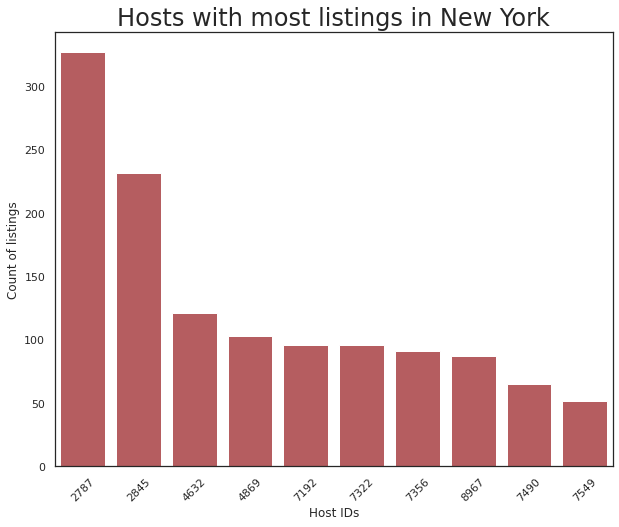

In [138]:
#Setting the figure size
sns.set(rc={'figure.figsize':(10,8)})

#Setting background colour of chart as white
sns.set_style('white')

#Plotting the Chart
viz_bar = sns.barplot(x= 'Host_Id', y= 'Counts', color='r', data=top_host_id,
                      order=top_host_id.sort_values('Counts',ascending = False).Host_Id)

#Setting font size for title
sns.set(font_scale = 2)

# Naming the Chart
viz_bar.set_title('Hosts with most listings in New York')

# Naming X & Y axis
viz_bar.set_xlabel('Host IDs')
viz_bar.set_ylabel('Count of listings')

#Adjusting Bar labels
viz_bar.set_xticklabels(viz_bar.get_xticklabels(), rotation=45)
